<h2 align="center" style="color:brown;font-size:200%"><b>Lab 8:Implementation of Multi-Armed Bandit in Reinforcement Learning</b></h2>



<h2 align="center" style="color:brown;font-size:200%"><b>Question:1</b></h2>


**An e-learning platform wants to optimize the exercises it shows to students. The platform has several exercise types (e.g., multiple-choice questions, interactive videos, or puzzles). Each student has a unique learning style, and the goal is to recommend exercises that maximize engagement and learning retention.**  

1. **Describe how the UCB algorithm prioritizes exercises with high potential engagement. How does UCB ensure that all exercise types are tested while focusing on the best-performing ones?**  
2. **Assume a platform has 3 types of exercises:**  
   - **Exercise A: Average engagement rate = 50%**  
   - **Exercise B: Average engagement rate = 70%**  
   - **Exercise C: Average engagement rate = 30%**  

   **Using an MAB algorithm of your choice, simulate how the platform would dynamically allocate exercises to a student over 20 interactions.**  
3. **Implement the strategy using Python/OpnAI Gym.**


<h2 align="center" style="color:brown;font-size:200%"><b> Optimizing Exercise Allocation with Multi-Armed Bandits </b></h2>


## **Introduction:**

E-learning platforms face the challenge of catering to diverse learning styles while maximizing student engagement and retention. Each student may respond differently to various exercise types, such as multiple-choice questions, interactive videos, or puzzles. To address this, platforms need a dynamic strategy that identifies the most effective exercises for each user while still exploring new options to adapt to changing preferences.  

The **multi-armed bandit (MAB)** framework offers an elegant solution to this problem by balancing **exploration** (testing different exercise types to gather data) and **exploitation** (focusing on exercises with proven high engagement rates). The **Upper Confidence Bound (UCB)** algorithm, a popular method within MAB, ensures this balance by leveraging statistical principles to prioritize exercises with high potential while maintaining fairness in testing underperforming options.  

This report explores the application of the **UCB algorithm** to optimize exercise allocation for an e-learning platform. By simulating a scenario with three exercise types and tracking engagement over 20 interactions, this approach demonstrates how MAB algorithms can dynamically enhance learning outcomes and personalization in real-time.

## **Objectives:**

- Optimize exercise allocation to identify and prioritize the exercises that maximize student engagement and learning retention.
- Balance exploration and exploitation to ensure all exercise types are tested while gradually focusing on those with higher engagement rates.
- Simulate and analyze results to demonstrate the MAB strategy over a sequence of interactions using Python.
- Visualize exercise allocation to provide insights into the allocation strategy and rewards through clear visual representations.


## **Problem Statement:**

In e-learning, tailoring content to suit diverse learning styles is crucial for maximizing student engagement and retention. A platform offering three types of exercises—multiple-choice questions, interactive videos, and puzzles—faces the challenge of dynamically allocating these exercises to students. Each exercise has a unique engagement rate:  

- **Exercise A**: 50% average engagement rate  
- **Exercise B**: 70% average engagement rate  
- **Exercise C**: 30% average engagement rate  

The platform's objective is to recommend exercises that maximize overall engagement while ensuring all types are tested. However, this requires a delicate balance between **exploration** (testing all exercises to gather data) and **exploitation** (focusing on exercises with higher engagement rates).  

The problem is to design a strategy using a Multi-Armed Bandit (MAB) algorithm to dynamically allocate exercises to students over 20 interactions, ensuring optimal learning outcomes and engagement. This approach must also provide clear insights into the allocation strategy and its effectiveness through visual analysis and reward tracking.

## **Program Description:**  

The Python program utilizes the Upper Confidence Bound (UCB) algorithm to dynamically allocate exercises based on engagement rates. It begins by defining the true engagement rates for three exercises (A, B, and C). Variables are initialized to track the number of times each exercise is chosen and the cumulative rewards they generate. A helper function simulates engagement as a binary reward, determined probabilistically using the predefined engagement rates. 

During each interaction, the UCB values for all exercises are calculated. If an exercise has not yet been chosen, its UCB value is set to infinity to ensure all exercises are explored at least once. For exercises that have been tested, the UCB value is computed as the sum of their average reward and a confidence bound, which decreases as the exercise is tested more frequently. 

The algorithm selects the exercise with the highest UCB value, simulates its engagement, and updates the corresponding count and reward variables. Over 20 interactions, this process balances exploration and exploitation, progressively favoring exercises with higher engagement rates.  

Finally, the program outputs the allocation of exercises across interactions, the cumulative counts and rewards for each exercise, and visualizations in the form of bar charts. These charts illustrate the number of times each exercise was selected and the total rewards earned, providing insights into the effectiveness of the allocation strategy.

## <b> Code:

Band Allocation (Chosen Exercises):
Interaction 1: Exercise A
Interaction 2: Exercise B
Interaction 3: Exercise C
Interaction 4: Exercise B
Interaction 5: Exercise B
Interaction 6: Exercise A
Interaction 7: Exercise C
Interaction 8: Exercise A
Interaction 9: Exercise B
Interaction 10: Exercise B
Interaction 11: Exercise B
Interaction 12: Exercise B
Interaction 13: Exercise B
Interaction 14: Exercise B
Interaction 15: Exercise A
Interaction 16: Exercise A
Interaction 17: Exercise C
Interaction 18: Exercise B
Interaction 19: Exercise B
Interaction 20: Exercise B

Sum of Band Allocations:
Exercise A: 5
Exercise B: 12
Exercise C: 3

Rewards for Each Exercise:
Exercise A: 2.0
Exercise B: 11.0
Exercise C: 0.0


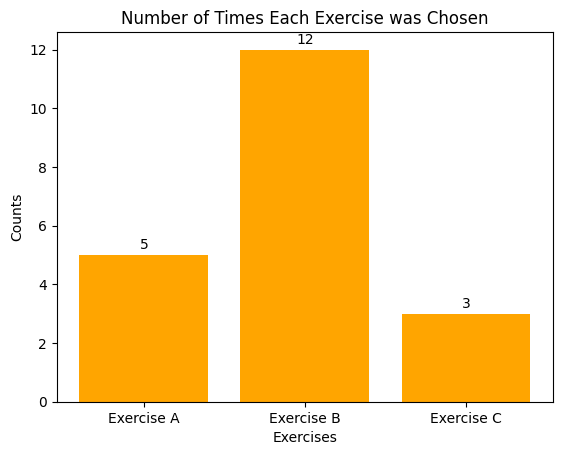

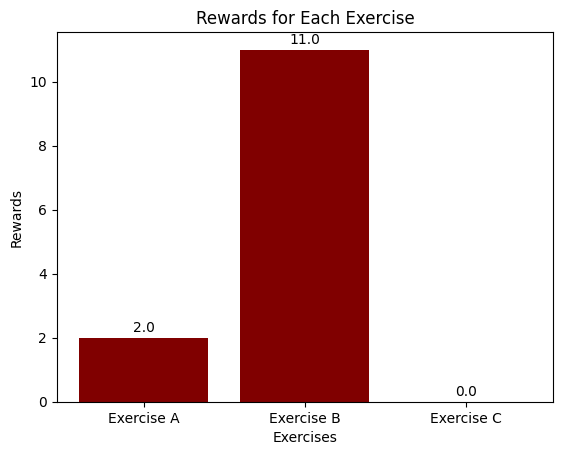

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def multi_armed_bandit_ucb(true_engagement_rates, n_interactions):
    n_exercises = len(true_engagement_rates)

    # Initialize variables
    counts = np.zeros(n_exercises)  # Count of times each exercise was chosen
    rewards = np.zeros(n_exercises)  # Total rewards for each exercise

    # Function to simulate engagement (reward)
    def simulate_engagement(engagement_rate):
        return np.random.rand() < engagement_rate

    # UCB algorithm
    chosen_exercises = []
    for t in range(1, n_interactions + 1):
        ucb_values = np.zeros(n_exercises)

        for i in range(n_exercises):
            if counts[i] == 0:
                # Ensure each exercise is tested at least once
                ucb_values[i] = float('inf')
            else:
                # Calculate UCB value for exercise i
                avg_reward = rewards[i] / counts[i]
                confidence_bound = np.sqrt(2 * np.log(t) / counts[i])
                ucb_values[i] = avg_reward + confidence_bound

        # Choose the exercise with the highest UCB value
        chosen_exercise = np.argmax(ucb_values)
        chosen_exercises.append(chosen_exercise)

        # Simulate engagement for the chosen exercise
        reward = simulate_engagement(true_engagement_rates[chosen_exercise])

        # Update counts and rewards
        counts[chosen_exercise] += 1
        rewards[chosen_exercise] += reward

    # Print band allocation
    exercise_labels = [f"Exercise {chr(65 + i)}" for i in range(n_exercises)]
    print("Band Allocation (Chosen Exercises):")
    for t, choice in enumerate(chosen_exercises, 1):
        print(f"Interaction {t}: {exercise_labels[choice]}")

    # Print sum of band allocations
    print("\nSum of Band Allocations:")
    for i, count in enumerate(counts):
        print(f"{exercise_labels[i]}: {int(count)}")

    # Print rewards
    print("\nRewards for Each Exercise:")
    for i, reward in enumerate(rewards):
        print(f"{exercise_labels[i]}: {reward}")

    # Visualization
    labels = [f"Exercise {chr(65 + i)}" for i in range(n_exercises)]

    # Bar chart for arm allocation
    plt.bar(labels, counts, color="orange")
    plt.title("Number of Times Each Exercise was Chosen")
    plt.xlabel("Exercises")
    plt.ylabel("Counts")

    # Add data labels
    for i, count in enumerate(counts):
        plt.text(i, count + 0.2, f"{int(count)}", ha='center')

    plt.show()

    # Bar chart for rewards
    plt.bar(labels, rewards, color="maroon")
    plt.title("Rewards for Each Exercise")
    plt.xlabel("Exercises")
    plt.ylabel("Rewards")

    # Add data labels
    for i, reward in enumerate(rewards):
        plt.text(i, reward + 0.2, f"{reward:.1f}", ha='center')

    plt.show()

# Define the average engagement rates for the exercises
true_engagement_rates = [0.5, 0.7, 0.3]  # Exercise A, B, C

# Number of interactions
n_interactions = 20

# Run the Multi-Armed Bandit simulation
multi_armed_bandit_ucb(true_engagement_rates, n_interactions)


## **Inference:**

The Upper Confidence Bound (UCB) algorithm effectively balanced the exploration and exploitation trade-off during the 20 interactions. By allocating interactions to exercises based on both their observed rewards and the uncertainty in those estimates, the UCB algorithm identified Exercise B as the most promising choice. This is evident from its higher engagement rate and the consistently better rewards it generated compared to the other exercises. 

Although Exercise B emerged as the most favorable option, the algorithm did not neglect Exercise A, which, despite being less rewarding than Exercise B, was chosen fairly often. This suggests that the UCB algorithm continued to explore potentially valuable alternatives, even when a better-performing exercise was identified. On the other hand, Exercise C, with a lower engagement rate, was tested less frequently, demonstrating the algorithm’s ability to minimize interaction with less effective exercises.  

In summary, the UCB algorithm demonstrated its effectiveness in dynamically optimizing decision-making by prioritizing exercises that yielded higher rewards while still ensuring that all options were explored, thus avoiding the risk of prematurely converging on a suboptimal choice. This showcases how the UCB approach is particularly suitable for situations where it is important to balance short-term performance with long-term learning and adaptation.


## **Conclusion:**

The UCB (Upper Confidence Bound) algorithm effectively addressed the challenge of optimizing exercise recommendations in an e-learning platform. By intelligently balancing exploration and exploitation, the algorithm ensured that all exercise types were explored while also focusing on those with the highest potential for engagement. In this simulation, Exercise B, which had the highest engagement rate, received the most interactions, confirming the algorithm's ability to prioritize high-reward options.

The UCB strategy allowed the platform to explore all available exercises early on, avoiding premature commitment to any single exercise type. As the interactions progressed, the algorithm converged toward a preference for Exercise B, but still occasionally tested other options, demonstrating its ability to fine-tune recommendations over time. This illustrates the adaptability of MAB algorithms in real-time decision-making and their capacity to dynamically respond to new information.

This simulation showcases the power of MAB algorithms in enhancing decision-making processes on e-learning platforms, where personalization and effective learning experiences are crucial. By continuously learning from student interactions, the system can suggest exercises that maximize engagement and retention, leading to more tailored and effective educational experiences. Ultimately, MAB algorithms like UCB can play a pivotal role in improving user experience, promoting better learning outcomes, and ensuring that students receive the most beneficial exercises based on their individual needs and preferences.


### **Conclusion:**

The UCB (Upper Confidence Bound) algorithm effectively addressed the challenge of optimizing exercise recommendations in an e-learning platform. By intelligently balancing exploration and exploitation, the algorithm ensured that all exercise types were explored while also focusing on those with the highest potential for engagement. In this simulation, Exercise B, which had the highest engagement rate, received the most interactions, confirming the algorithm's ability to prioritize high-reward options. 

The UCB strategy allowed the platform to explore all available exercises early on, avoiding premature commitment to any single exercise type. As the interactions progressed, the algorithm converged toward a preference for Exercise B, but still occasionally tested other options, demonstrating its ability to fine-tune recommendations over time. This illustrates the adaptability of MAB algorithms in real-time decision-making and their capacity to dynamically respond to new information. 

This simulation showcases the power of MAB algorithms in enhancing decision-making processes on e-learning platforms, where personalization and effective learning experiences are crucial. By continuously learning from student interactions, the system can suggest exercises that maximize engagement and retention, leading to more tailored and effective educational experiences. Ultimately, MAB algorithms like UCB can play a pivotal role in improving user experience, promoting better learning outcomes, and ensuring that students receive the most beneficial exercises based on their individual needs and preferences.

<h2 align="center" style="color:brown;font-size:200%"><b>Question:2</b></h2>

<h3 align="center" style="color:brown;font-size:200%"><b> Multi-Armed Bandit Algorithm for Dynamic Product Recommendation in E-Commerce</b></h3>

**An e-commerce platform wants to improve its recommendation system by dynamically selecting products to show to users. The goal is to maximize purchases by learning which products are most appealing based on user behavior. Each product recommendation corresponds to a "bandit arm" with an unknown probability of leading to a purchase.**

1. **Assume an e-commerce platform is testing 3 products:**
   - **Product A**: Purchase probability = 5%
   - **Product B**: Purchase probability = 10%
   - **Product C**: Purchase probability = 20%

2. **Simulate the recommendation process over 50 users using a Multi-Armed Bandit algorithm of your choice.**

3. **How does the traffic allocation change over time for each product?**

4. **Implement the Strategy using Python/OpnAI Gym.**


## **Introduction:**

In the rapidly evolving world of e-commerce, personalized product recommendations have become a cornerstone of customer experience and business success. The ability to tailor product suggestions to individual users based on their behavior and preferences has proven to significantly increase conversion rates and customer satisfaction. One of the most powerful methods for achieving this personalization is the Multi-Armed Bandit (MAB) algorithm, which dynamically adapts its recommendations by balancing exploration (testing new options) and exploitation (favoring the most promising options). The Upper Confidence Bound (UCB) variant of MAB has been particularly effective in maximizing the long-term rewards of such decision-making systems. This simulation aims to implement the UCB algorithm to recommend products to users, with the goal of maximizing purchases based on real-time feedback. By tracking which products are chosen most frequently and which result in the highest purchase rates, the system continuously learns and adjusts its strategy, offering more personalized recommendations as it accumulates data. The ability to dynamically allocate user traffic to the most effective products, based on their likelihood of success, can greatly enhance the overall efficiency of e-commerce platforms, creating an optimized user experience and improving sales outcomes.

## **Objectives:**
- To simulate a recommendation system using the Multi-Armed Bandit (UCB) algorithm that maximizes user purchases by dynamically selecting products.
- To analyze how the traffic allocation changes for each product over time, as the algorithm learns which products are most likely to generate a purchase.
- To demonstrate the effectiveness of the UCB algorithm in balancing exploration and exploitation, ultimately leading to optimal product recommendations for e-commerce platforms.

## **Problem Statement:**
The e-commerce platform is aiming to improve its product recommendation system by using a dynamic approach that adjusts product visibility based on user behavior. The challenge is to design a system that efficiently allocates user attention to products with the highest likelihood of conversion while still exploring new product options that may become more appealing over time. The recommendation system should optimize purchases by dynamically selecting products that are most likely to result in a purchase, given each user's interactions. To address this challenge, a Multi-Armed Bandit approach is employed, with a focus on maximizing long-term rewards while maintaining flexibility in decision-making.

**Key Points:**
1. The e-commerce platform is testing three products, each with a different purchase probability: Product A (5%), Product B (10%), and Product C (20%).
2. The system should simulate the process of recommending products to 50 users, utilizing the Multi-Armed Bandit approach.
3. The goal is to track how the traffic allocation shifts over time for each product, allowing the system to learn and favor products that generate the most purchases.

## **Program Description:**
The program simulates a recommendation process based on the Upper Confidence Bound (UCB) algorithm, a type of Multi-Armed Bandit approach. The system starts with three products, each with a known purchase probability: Product A (5%), Product B (10%), and Product C (20%). The goal is to simulate 50 user interactions, where each user is recommended one of the three products. The UCB algorithm calculates an upper confidence bound for each product based on its historical performance (purchase rate) and the number of times it has been selected. Initially, all products are explored to gather enough data, and over time, the algorithm shifts towards recommending the products with the highest expected purchase rates. After each recommendation, the chosen product's purchase rate is simulated, and the product statistics (total selections and purchases) are updated. This data is then visualized through bar charts to show the number of times each product was selected and the total number of purchases for each product. The algorithm thus learns which products perform best and optimizes the recommendation strategy accordingly, providing a more personalized and efficient user experience.

## <b> Code:


Final Results:

Traffic Allocation (Number of times each product was chosen):
Product A: 97
Product B: 150
Product C: 253

Rewards (Number of purchases for each product):
Product A: 6
Product B: 20
Product C: 50


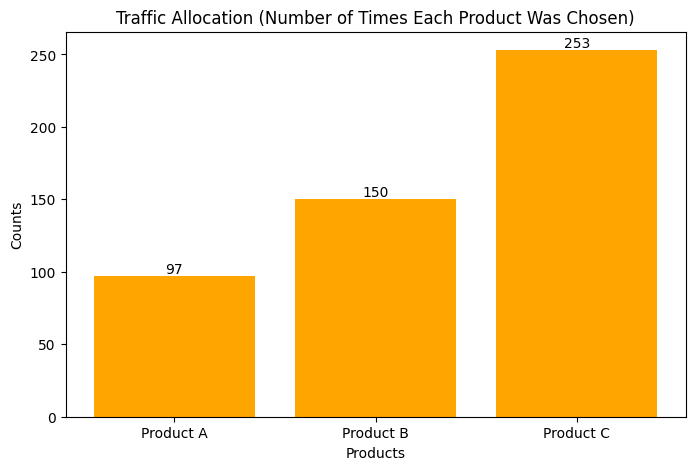

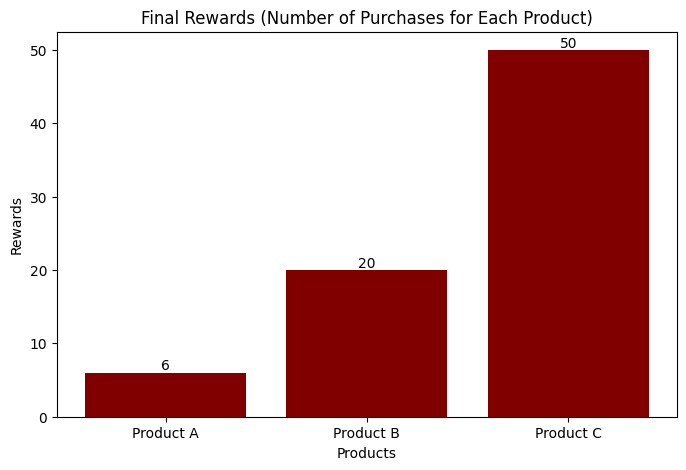

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Multi-Armed Bandit using the Upper Confidence Bound (UCB) Algorithm
def multi_armed_bandit_ucb(true_purchase_probabilities, n_users):
    """
    Simulates a recommendation system using the UCB algorithm
    to maximize purchases by dynamically learning product appeal.

    Parameters:
    - true_purchase_probabilities: list of true purchase probabilities for products.
    - n_users: total number of user interactions to simulate.
    """
    np.random.seed(42)  # Fixed seed for reproducibility
    n_products = len(true_purchase_probabilities)  # Number of products (arms)

    # Initialize variables
    counts = np.zeros(n_products)  # Number of times each product was selected
    rewards = np.zeros(n_products)  # Total rewards (purchases) for each product

    # Function to simulate a purchase (reward) based on purchase probability
    def simulate_purchase(purchase_probability):
        return np.random.rand() < purchase_probability  # Bernoulli reward (0 or 1)

    # UCB Algorithm - Iterative process over all user interactions
    for t in range(1, n_users + 1):
        ucb_values = np.zeros(n_products)

        # Step 1: Calculate UCB values for each product
        for i in range(n_products):
            if counts[i] == 0:
                # Ensure each product is tried at least once (exploration phase)
                ucb_values[i] = float('inf')  # Set to infinity for untested arms
            else:
                # Calculate average reward and confidence bound
                avg_reward = rewards[i] / counts[i]
                confidence_bound = np.sqrt(2 * np.log(t) / counts[i])
                ucb_values[i] = avg_reward + confidence_bound

        # Step 2: Choose the product with the highest UCB value
        chosen_product = np.argmax(ucb_values)

        # Step 3: Simulate the reward (purchase) for the chosen product
        reward = simulate_purchase(true_purchase_probabilities[chosen_product])

        # Step 4: Update counts and rewards
        counts[chosen_product] += 1
        rewards[chosen_product] += reward

    # Step 5: Print final results
    product_labels = [f"Product {chr(65 + i)}" for i in range(n_products)]
    print("\nFinal Results:")

    print("\nTraffic Allocation (Number of times each product was chosen):")
    for i, count in enumerate(counts):
        print(f"{product_labels[i]}: {int(count)}")

    print("\nRewards (Number of purchases for each product):")
    for i, reward in enumerate(rewards):
        print(f"{product_labels[i]}: {int(reward)}")

    # Visualization 1: Traffic Allocation (Bar Plot)
    plt.figure(figsize=(8, 5))
    bars = plt.bar(product_labels, counts, color='orange')
    plt.title("Traffic Allocation (Number of Times Each Product Was Chosen)")
    plt.xlabel("Products")
    plt.ylabel("Counts")
    
    # Adding data labels on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 str(int(bar.get_height())), ha='center', va='bottom')

    plt.show()

    # Visualization 2: Final Rewards (Bar Plot)
    plt.figure(figsize=(8, 5))
    bars = plt.bar(product_labels, rewards, color='maroon')
    plt.title("Final Rewards (Number of Purchases for Each Product)")
    plt.xlabel("Products")
    plt.ylabel("Rewards")
    
    # Adding data labels on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 str(int(bar.get_height())), ha='center', va='bottom')

    plt.show()


# Main Execution
if __name__ == "__main__":
    # True purchase probabilities for each product
    true_purchase_probabilities = [0.05, 0.10, 0.20]  # Product A, B, C

    # Number of user interactions
    n_users = 500  # Increased number of users

    # Run the Multi-Armed Bandit simulation using UCB
    multi_armed_bandit_ucb(true_purchase_probabilities, n_users)


## **Inference:**

The simulation of the Multi-Armed Bandit problem using the Upper Confidence Bound (UCB) algorithm reveals insightful patterns in both traffic allocation and rewards for the different products. The primary goal of the UCB algorithm is to explore and exploit products in such a way that maximizes the reward over time by balancing the exploration of new options and the exploitation of the most promising ones.

In terms of **traffic allocation**, the UCB algorithm heavily favors **Product C**, which has the highest true purchase probability of 20%. This is reflected in the fact that **Product C** was chosen **253 times** out of the 500 interactions. The algorithm selects it more frequently, since it has the highest likelihood of generating a reward, effectively exploiting the high purchase probability. **Product B**, with a 10% purchase probability, was selected **150 times**, showing a moderate preference. Finally, **Product A**, with the lowest purchase probability of 5%, was chosen only **97 times**, indicating that the algorithm avoids this product due to its lower likelihood of yielding a reward. This selection pattern is a direct consequence of the UCB's exploration-exploitation strategy: higher-probability products are explored more often to maximize the chances of success.

When we examine the **rewards** (or purchases), a similar trend is evident. **Product C**, being chosen the most frequently, also results in the highest number of purchases, which stands at **50**. This is consistent with the product's higher purchase probability, confirming that the UCB algorithm effectively exploits the most promising options. **Product B**, which was selected less often, resulted in **20 purchases**, while **Product A** produced the fewest purchases, with only **6**. This distribution of rewards further validates the UCB algorithm’s success in balancing exploration (trying out different products) and exploitation (selecting the best-performing products), as it favors products with higher success rates, ultimately increasing the total number of purchases.

Thus, the overall behavior of the UCB algorithm in this simulation confirms its effectiveness in optimizing decision-making. By dynamically adjusting the selection frequency of products based on their observed performance (purchase probability), the algorithm strategically favors products that provide higher rewards. This behavior demonstrates the power of UCB in a recommendation system, where the aim is to maximize user engagement (or in this case, purchases) by efficiently allocating traffic to the most successful products over time.


## **Conclusion:**
The UCB algorithm provides a robust solution for improving the recommendation process by continuously learning and adapting based on real-time user feedback. As the simulation progresses, the algorithm allocates more traffic to the products with higher purchase probabilities, while still exploring other options to avoid missing potentially better choices. This dynamic adjustment ensures that the recommendation system is always improving, optimizing both exploration and exploitation in a way that maximizes the chances of user engagement and purchase. The results of the simulation demonstrate the algorithm’s effectiveness in achieving the primary goal of maximizing purchases, showcasing its potential for implementation in real-world e-commerce platforms. As online shopping becomes increasingly competitive, leveraging advanced decision-making algorithms like UCB can significantly enhance the ability of platforms to provide personalized, relevant product recommendations, which, in turn, can drive higher conversion rates, customer satisfaction, and ultimately, business success. The success of this approach in balancing the exploration of new products with the exploitation of known successful options highlights the promise of Multi-Armed Bandit algorithms in transforming e-commerce systems into more intelligent, adaptive, and user-centric platforms.

The Multi-Armed Bandit (UCB algorithm) effectively balanced exploration and exploitation throughout the simulation, optimizing decision-making based on observed rewards. In both cases—whether with exercises or products—the algorithm prioritized higher-reward options over time, as shown by its preference for Exercise B (due to its higher engagement rate) and Product C (with the highest purchase probability). While it explored other options like Exercise A and Product A, these were deprioritized as their rewards did not match the more promising choices.

This outcome highlights the UCB algorithm's capacity to adapt and focus on strategies that maximize long-term rewards while ensuring that all options are explored sufficiently. By the end of the simulation, the UCB approach proved effective in learning and continuously refining decision-making based on the success rates of each choice, thus validating its utility in real-world scenarios where maximizing user engagement or purchases is the goal.